In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

def load_gis_data(park_shapefile, trails_shapefile, roads_shapefile):
    """
    Load GIS data (shapefiles) using GeoPandas.
    """
    park = gpd.read_file(park_shapefile)
    trails = gpd.read_file(trails_shapefile)
    roads = gpd.read_file(roads_shapefile)
    return park, trails, roads

def plot_map(park, trails, roads, output_pdf):
    """
    Plot the GIS data and save it to a PDF.
    """
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the background (roads)
    roads.plot(ax=ax, color='gray', linewidth=0.5)

    # Plot the park boundary
    park.plot(ax=ax, color='lightgreen', edgecolor='green', linewidth=2, label='Park Boundary')

    # Plot the trails
    trails.plot(ax=ax, color='brown', linewidth=1.5, label='Trails')

    # Set the title and labels
    ax.set_title('Park with Trails', fontsize=16)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Add a legend
    ax.legend(loc='upper right')

    # Remove axis ticks for better visualization
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

    # Save the plot to the output PDF
    # with PdfPages(output_pdf) as pdf:
    #     pdf.savefig(fig)
    #     plt.close(fig)

def main():
    # Define file paths (adjust paths as needed)
    park_shapefile = "path_to_park_shapefile.shp"
    trails_shapefile = "path_to_trails_shapefile.shp"
    roads_shapefile = "path_to_roads_shapefile.shp"
    output_pdf = "park_map.pdf"
    
    # Load GIS data
    park, trails, roads = load_gis_data(park_shapefile, trails_shapefile, roads_shapefile)
    
    # Generate and save the map to a PDF
    plot_map(park, trails, roads, output_pdf)
    print(f"Map saved to {output_pdf}")

if __name__ == "__main__":
    main()


DataSourceError: path_to_park_shapefile.shp: No such file or directory

In [7]:
import urllib
from io import BytesIO
import geopandas

url = 'https://gisweb.ci.roswell.ga.us/arcgis/rest/services/LGIM_Parks/Park_Facilities/MapServer/28/query?where=1%3D1&timeRelation=esriTimeRelationOverlaps&geometryType=esriGeometryEnvelope&spatialRel=esriSpatialRelIntersects&units=esriSRUnit_Foot&returnGeometry=true&returnTrueCurves=false&returnIdsOnly=false&returnCountOnly=false&returnZ=false&returnM=false&returnDistinctValues=false&returnExtentOnly=false&sqlFormat=none&featureEncoding=esriDefault&f=geojson'

response = urllib.request.urlopen(url, {})
json = response.read()

jsonIO = BytesIO(json)

zones = geopandas.read_file(jsonIO, driver = 'GeoJSON')
print(type(zones))

<class 'geopandas.geodataframe.GeoDataFrame'>


/opt/homebrew/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(


<Axes: >

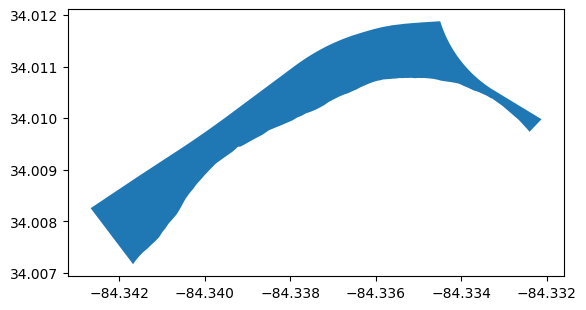

In [13]:
mask = zones.Name == 'Don White Memorial Park'
zones[mask].plot()

In [12]:
import re
[ name for name in zones.Name if re.search( r'Don', name ) ]

['Don White Memorial Park']

In [16]:
park_data_directory_url = 'https://gisweb.ci.roswell.ga.us/arcgis/rest/services/LGIM_Parks/Park_Facilities/MapServer'
response = urllib.request.urlopen( park_data_directory_url )
html = response.read()

layers = re.search( r'\/(\d+)">([^<]+)<\/a', html )
print( layers.groups() )

TypeError: cannot use a string pattern on a bytes-like object

In [18]:
response.read()


b''